In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn
!pip install torch torchvision



In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
from torchvision import models
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define the path to the ResNet model
model_path = '/content/drive/MyDrive/ML final project/Trained_models/Classifier/ResNet_best_eye_color_classifier.pth'

# Load the state_dict
loaded_state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Define a ResNet model
model = models.resnet18()  # Adjust to the correct ResNet version (e.g., resnet50 if applicable)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, len(loaded_state_dict['fc.weight']))

# Load the weights into the model
model.load_state_dict(loaded_state_dict)

# Put the model in evaluation mode
model.eval()

print("Model loaded successfully!")



<ipython-input-10-175b7913db96>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_state_dict = torch.load(model_path, map_location=torch.device('cpu'))


KeyError: 'fc.weight'

Shrink the Latent Dimension and Tuning

In [ ]:
# Define the encoder model with variable latent space size
def build_encoder(latent_dim=64, img_height=32, img_width=28, channels=3):
    input_img = layers.Input(shape=(img_height, img_width, channels))
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(input_img)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, activation='relu')(x)

    encoder = models.Model(input_img, latent)
    return encoder


First few encoded labels: [1 1 1 1 1 1 1 1 1 1]


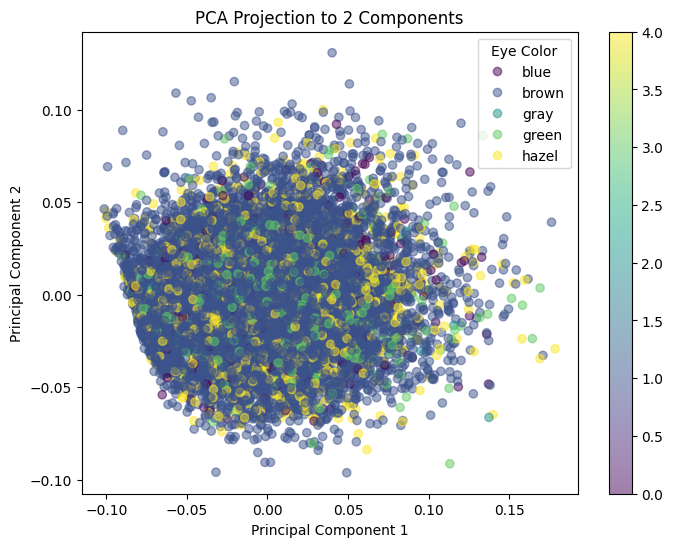

Classes: ['blue' 'brown' 'gray' 'green' 'hazel']


In [ ]:


# Load the labels from the CSV file
labels_df = pd.read_csv('/content/drive/MyDrive/ML final project/datasets/iris_labels_full.csv')

# Extract the 'label' column
labels = labels_df['label'].to_numpy()

# Encode labels to numeric values (e.g., brown = 0, hazel = 1, etc.)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Print the first few encoded labels to confirm
print(f"First few encoded labels: {encoded_labels[:10]}")

# Function to apply PCA and color points by labels
def apply_pca(latent_vectors, labels=None, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_latent_vectors = pca.fit_transform(latent_vectors)

    # If labels are provided, use them for coloring the points
    if labels is not None:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.colorbar(scatter)  # Show color bar to indicate label values

        # Add label legend to match numeric values to actual colors
        handles, labels_legend = scatter.legend_elements()
        plt.legend(handles, label_encoder.classes_, title="Eye Color")
    else:
        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c='blue', alpha=0.5)

    plt.title(f'PCA Projection to {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    return reduced_latent_vectors

# Assuming latent_vectors is your encoded data, apply PCA and plot with labels
apply_pca(latent_vectors, labels=encoded_labels, n_components=2)

# Print class-to-number mapping for reference
print(f"Classes: {label_encoder.classes_}")

In [ ]:
# Function to resize images to 32x28
def resize_images(image_data, target_height=32, target_width=28):
    resized_images = []
    for img in image_data:
        resized_img = cv2.resize(img, (target_width, target_height))  # Resize each image to 32x28
        resized_images.append(resized_img)
    return np.array(resized_images)


image_data_resized = resize_images(image_data, target_height=32, target_width=28)

# Check the shape of the resized image data
print(image_data_resized.shape)  # It should print (11101, 32, 28, 3)


experiment_with_latent_dims(image_data_resized, latent_dims=[2, 4, 8])

#try using tnse or umap for this****************
#reconstruction error (how good is it)
#interpoation is stuff is ok to do with the training data
#maybe autoencder is overfit on this data so it can generalize
# if he hears we dont hav test data we are screwed (try stratified spilit sci-kit learn) i want 80-20 slit brwon eyes (20% of each class)
#report resconsutrtuctin error in loss
# train compnent and evaluation of acuracy is losss MSE
#maybe the reason it doesent work that well is because generally brown is very common eye color so the model kind of focuses on the facial structure so thats why you see the
# could justify cropping
#MLP VS CNN
#take latent vectors even though model hasnt seen al of traiingin data to tak about applications of classsifaction w latent vectors (if it works well it shows that latent vecot are goo and vise versa)
# next steps

NameError: name 'image_data' is not defined

In [ ]:


# Function to resize images to 32x28 (you may already have resized images)
def resize_images(image_data, target_height=32, target_width=28):
    resized_images = []
    for img in image_data:
        resized_img = cv2.resize(img, (target_width, target_height))  # Resize each image to 32x28
        resized_images.append(resized_img)
    return np.array(resized_images)

# Normalize the image data (scale the pixel values to the range 0 to 1)
def normalize_images(image_data):
    return image_data / 255.0  # Normalize pixel values to [0, 1]

# Assuming image_data is your original image data with shape (num_images, 28, 28, 3)
# Resize the image data
image_data_resized = resize_images(image_data, target_height=32, target_width=28)

# Normalize the resized image data
image_data_normalized = normalize_images(image_data_resized)

# Verify the shape and normalization
print(image_data_normalized.shape)  # Should be (num_images, 32, 28, 3)


(11101, 32, 28, 3)


In [ ]:


# Assuming `encoded_labels` contains the labels for the images
# If labels are not encoded yet, do that using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the image data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(image_data_normalized, encoded_labels, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (8880, 32, 28, 3)
Test data shape: (2221, 32, 28, 3)


In [ ]:


# Build a neural network model
def build_classifier(input_shape, output_dim):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Define the input shape correctly
    model.add(Flatten())  # Flatten the 4D input to a 1D vector
    model.add(Dense(128, activation='relu'))  # Hidden layer with 128 units
    model.add(Dense(64, activation='relu'))  # Hidden layer with 64 units
    model.add(Dense(output_dim, activation='softmax'))  # Output layer with softmax for multi-class classification
    return model

# Input shape is (32, 28, 3) for each image (height, width, channels)
input_shape = (32, 28, 3)
output_dim = len(np.unique(encoded_labels))  # Number of eye colors (e.g., 5 classes)

# Build the classifier
model = build_classifier(input_shape, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7570 - loss: 0.9844 - val_accuracy: 0.7731 - val_loss: 0.7688
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7815 - loss: 0.7539 - val_accuracy: 0.7731 - val_loss: 0.7478
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7761 - loss: 0.7373 - val_accuracy: 0.7731 - val_loss: 0.7363
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7790 - loss: 0.7247 - val_accuracy: 0.7731 - val_loss: 0.7337
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7793 - loss: 0.7212 - val_accuracy: 0.7731 - val_loss: 0.7273
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7761 - loss: 0.7242 - val_accuracy: 0.7731 - val_loss: 0.7257
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7756 - loss: 0.7196 - val_accuracy: 0.7731 - val_loss: 0.7224
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7798 - loss: 0.7039 - val_accuracy:

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


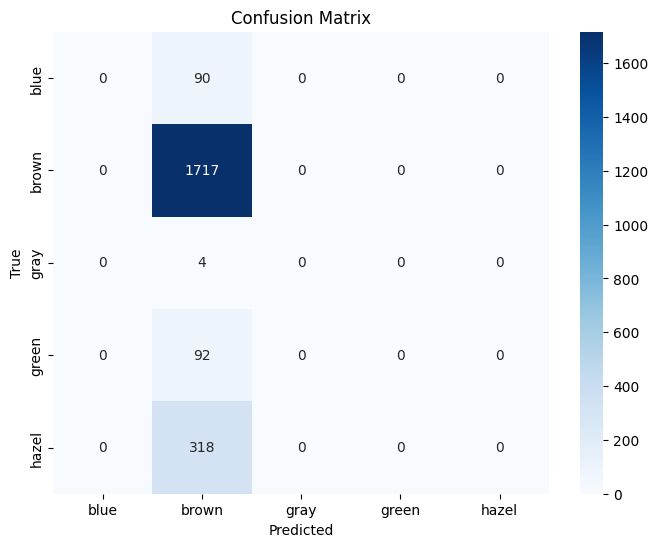

              precision    recall  f1-score   support

        blue       0.00      0.00      0.00        90
       brown       0.77      1.00      0.87      1717
        gray       0.00      0.00      0.00         4
       green       0.00      0.00      0.00        92
       hazel       0.00      0.00      0.00       318

    accuracy                           0.77      2221
   macro avg       0.15      0.20      0.17      2221
weighted avg       0.60      0.77      0.67      2221



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


In [ ]:
"""from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
def apply_pca(latent_vectors, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_latent_vectors = pca.fit_transform(latent_vectors)

    # Plot the reduced latent vectors (if 2D for visualization)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c='blue', alpha=0.5)
    plt.title(f'PCA Projection to {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    return reduced_latent_vectors

# Apply PCA to reduce the latent vectors to 2 components for better visualization
reduced_latent_vectors = apply_pca(latent_vectors, n_components=2)"""


"from sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n\n# Apply PCA for dimensionality reduction\ndef apply_pca(latent_vectors, n_components=2):\n    pca = PCA(n_components=n_components)\n    reduced_latent_vectors = pca.fit_transform(latent_vectors)\n\n    # Plot the reduced latent vectors (if 2D for visualization)\n    plt.figure(figsize=(8, 6))\n    plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c='blue', alpha=0.5)\n    plt.title(f'PCA Projection to {n_components} Components')\n    plt.xlabel('Principal Component 1')\n    plt.ylabel('Principal Component 2')\n    plt.show()\n\n    return reduced_latent_vectors\n\n# Apply PCA to reduce the latent vectors to 2 components for better visualization\nreduced_latent_vectors = apply_pca(latent_vectors, n_components=2)"

**Step 2: Experiment with Latent Space**
Step 2: Analyze Reduced Latent Vectors
This will help you visualize the reduced latent vectors in 2D, making it easier to understand patterns or clusters. By reducing the dimensions, the vectors may become more "understandable," especially when you visualize the spread of the latent space.

Step 3:

In [ ]:
"""from sklearn.cluster import KMeans

# Apply KMeans clustering on the latent vectors
def cluster_latent_vectors(latent_vectors, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(latent_vectors)

    # Plot clusters if 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.title(f'KMeans Clustering of Latent Vectors (k={n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Cluster the latent vectors and visualize the result
cluster_latent_vectors(reduced_latent_vectors, n_clusters=5)"""


"from sklearn.cluster import KMeans\n\n# Apply KMeans clustering on the latent vectors\ndef cluster_latent_vectors(latent_vectors, n_clusters=5):\n    kmeans = KMeans(n_clusters=n_clusters)\n    clusters = kmeans.fit_predict(latent_vectors)\n\n    # Plot clusters if 2D\n    plt.figure(figsize=(8, 6))\n    plt.scatter(reduced_latent_vectors[:, 0], reduced_latent_vectors[:, 1], c=clusters, cmap='viridis', alpha=0.6)\n    plt.title(f'KMeans Clustering of Latent Vectors (k={n_clusters})')\n    plt.xlabel('Principal Component 1')\n    plt.ylabel('Principal Component 2')\n    plt.show()\n\n# Cluster the latent vectors and visualize the result\ncluster_latent_vectors(reduced_latent_vectors, n_clusters=5)"

**Step 4: Generating Images from Latent Noise**

Now, we'll introduce a function that allows generating new images from random latent noise (i.e., completely random latent vectors). This can help you visualize how noise in the latent space can be turned into meaningful images.

This step will let you generate a random "latent vector" and feed it into the decoder to reconstruct a new image that may look like an eye (or other objects as you experiment further).

In [ ]:
"""# Function to generate images from random latent noise
def generate_images_from_noise(decoder, num_images=5, latent_dim=64):
    # Generate random latent vectors
    noise = np.random.normal(size=(num_images, latent_dim))  # Latent space noise (normal distribution)

    # Decode the noise into images
    generated_images = decoder.predict(noise)
    generated_images = np.clip(generated_images, 0, 1)

    # Visualize the generated images
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate images from random noise with a 64-dimensional latent vector
generate_images_from_noise(decoder, num_images=5, latent_dim=64)"""


"# Function to generate images from random latent noise\ndef generate_images_from_noise(decoder, num_images=5, latent_dim=64):\n    # Generate random latent vectors\n    noise = np.random.normal(size=(num_images, latent_dim))  # Latent space noise (normal distribution)\n\n    # Decode the noise into images\n    generated_images = decoder.predict(noise)\n    generated_images = np.clip(generated_images, 0, 1)\n\n    # Visualize the generated images\n    plt.figure(figsize=(15, 3))\n    for i in range(num_images):\n        plt.subplot(1, num_images, i + 1)\n        plt.imshow(generated_images[i])\n        plt.axis('off')\n    plt.tight_layout()\n    plt.show()\n\n# Generate images from random noise with a 64-dimensional latent vector\ngenerate_images_from_noise(decoder, num_images=5, latent_dim=64)"

**Step 5: Interpolating Latent Vectors**

Next, let's create a function to interpolate between two latent vectors. This allows you to smoothly transition between two images and explore the "in-between" states. This step can be helpful when you want to blend images or explore how latent space variations work.

In [ ]:
"""# Function to interpolate between two latent vectors
def interpolate_between_latents(latent_vector1, latent_vector2, num_steps=10):
    # Interpolate between two latent vectors
    alphas = np.linspace(0, 1, num_steps)  # Generate interpolation values
    interpolated_latents = []

    for alpha in alphas:
        interpolated_latent = (1 - alpha) * latent_vector1 + alpha * latent_vector2
        interpolated_latents.append(interpolated_latent)

    interpolated_latents = np.array(interpolated_latents)
    interpolated_images = decoder.predict(interpolated_latents)

    # Visualize the interpolated images
    plt.figure(figsize=(15, 3))
    for i in range(num_steps):
        plt.subplot(1, num_steps, i + 1)
        plt.imshow(interpolated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate two random latent vectors and interpolate between them
latent_vector1 = np.random.normal(size=(1, 64))  # Random latent vector 1
latent_vector2 = np.random.normal(size=(1, 64))  # Random latent vector 2
interpolate_between_latents(latent_vector1, latent_vector2, num_steps=10)"""


"# Function to interpolate between two latent vectors\ndef interpolate_between_latents(latent_vector1, latent_vector2, num_steps=10):\n    # Interpolate between two latent vectors\n    alphas = np.linspace(0, 1, num_steps)  # Generate interpolation values\n    interpolated_latents = []\n\n    for alpha in alphas:\n        interpolated_latent = (1 - alpha) * latent_vector1 + alpha * latent_vector2\n        interpolated_latents.append(interpolated_latent)\n\n    interpolated_latents = np.array(interpolated_latents)\n    interpolated_images = decoder.predict(interpolated_latents)\n\n    # Visualize the interpolated images\n    plt.figure(figsize=(15, 3))\n    for i in range(num_steps):\n        plt.subplot(1, num_steps, i + 1)\n        plt.imshow(interpolated_images[i])\n        plt.axis('off')\n    plt.tight_layout()\n    plt.show()\n\n# Generate two random latent vectors and interpolate between them\nlatent_vector1 = np.random.normal(size=(1, 64))  # Random latent vector 1\nlatent_vecto

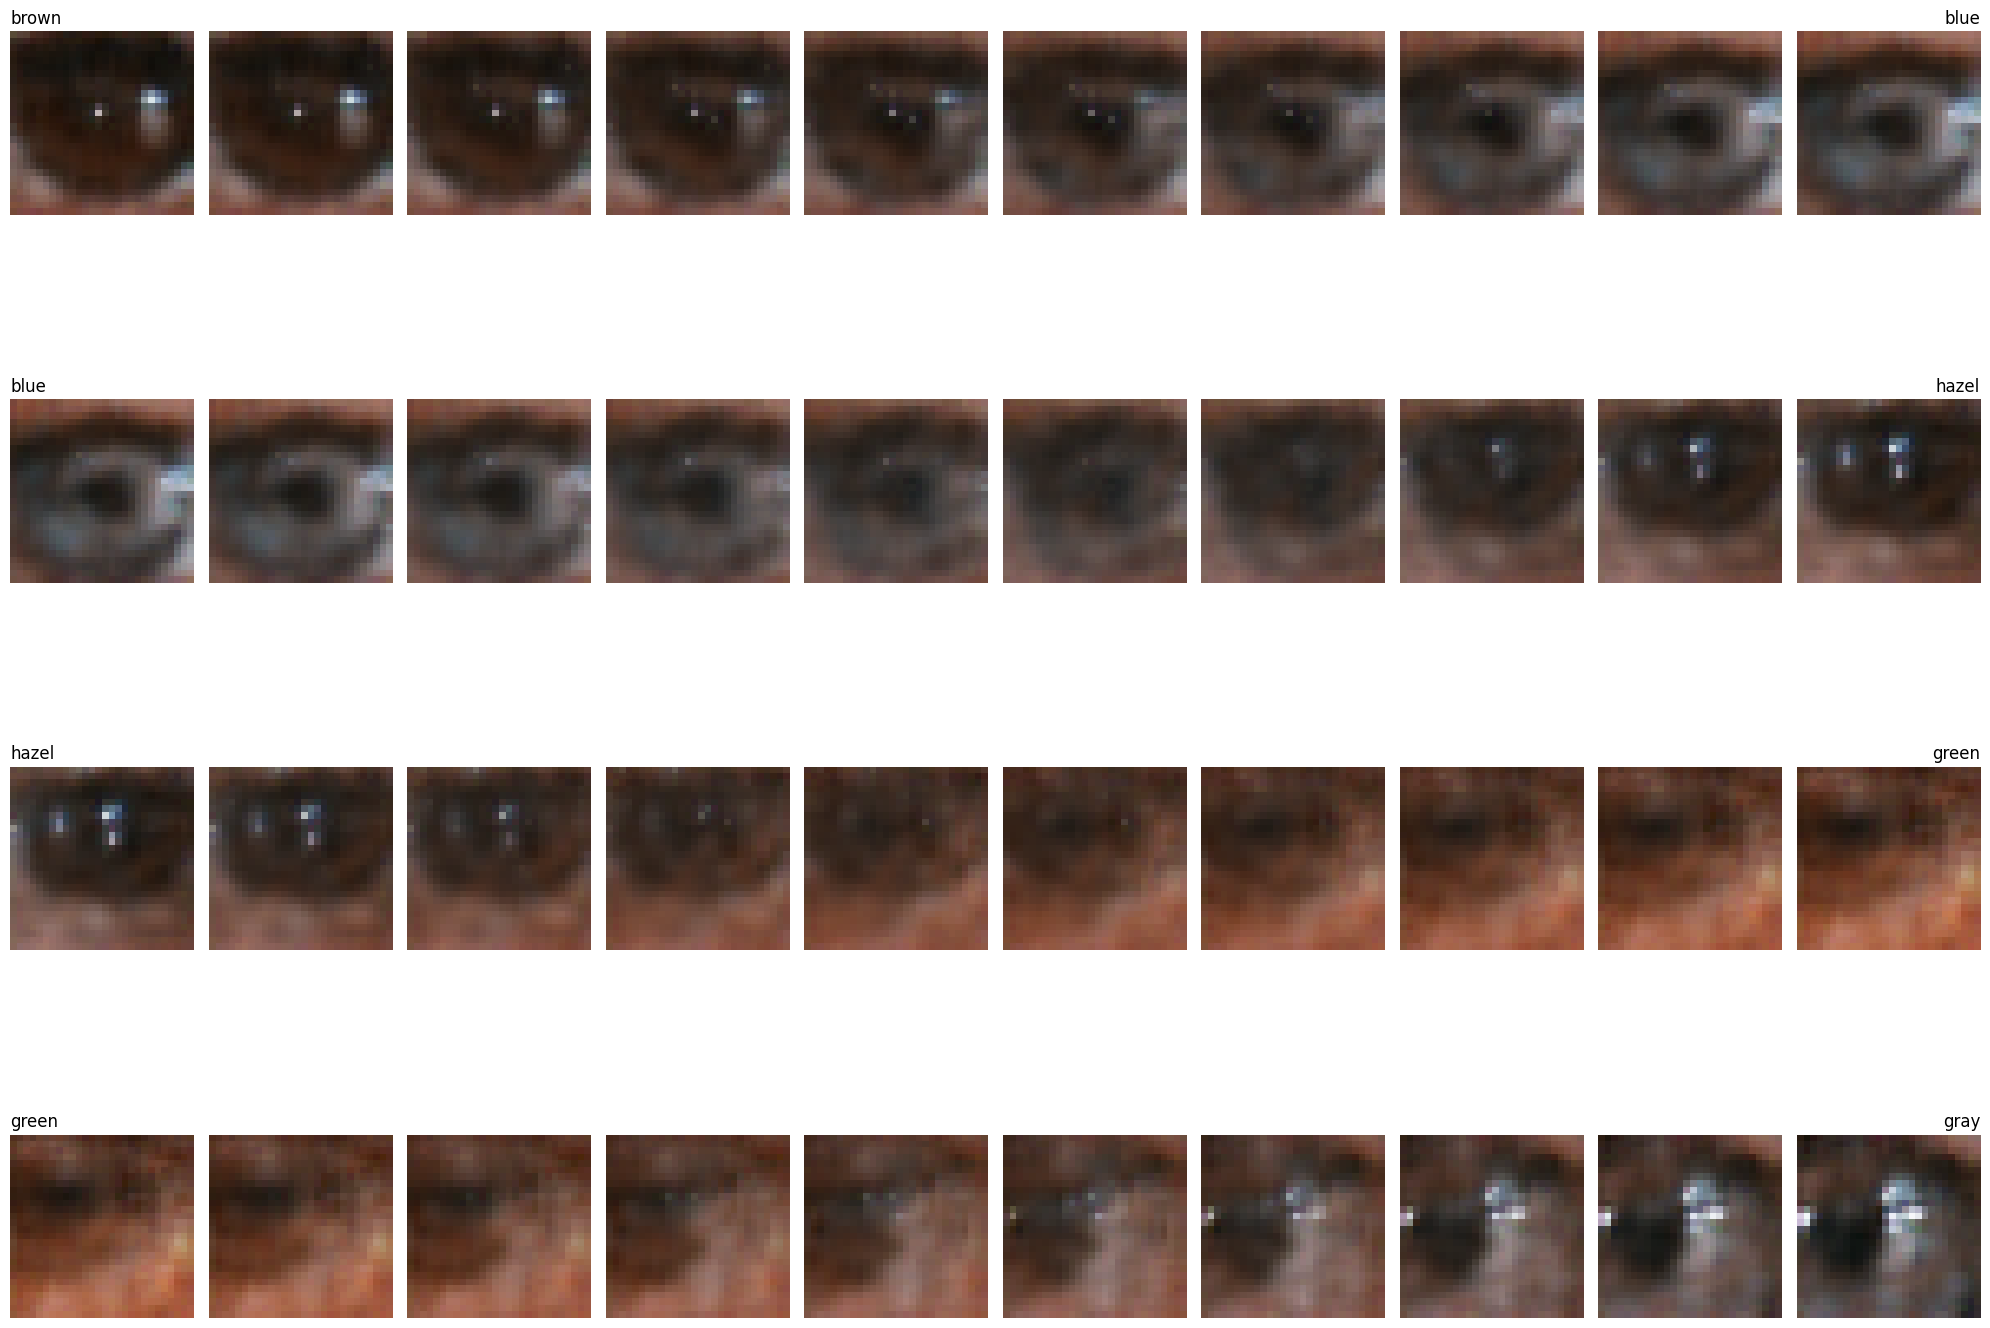